# (6m) Noise 0uV

author: steeve.laquitaine@epfl.ch

## Setup

activate spikeinterf...

In [1]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
from src.nodes.postpro.accuracy import get_sorting_accuracies
import spikeinterface as si 
from spikeinterface import comparison

# DATASETS

# BUCCINO 2020 
data_conf, _ = get_config("buccino_2020", "2020").values()
BUCCI_KS3_SORTING_PATH = data_conf["sorting"]["sorters"]["kilosort3"]["output_buttw"]
BUCCI_GT_SORTING_PATH = data_conf["sorting"]["simulation"]["ground_truth"]["output"]

# SILICO MARQUES
data_conf_marques, _ = get_config("silico_neuropixels", "concatenated").values()
GT_SORTING_PATH_marques = data_conf_marques["sorting"]["simulation"]["ground_truth"]["output"]
SFREQ = 40000

# SORTINGS

# kilosort 4.0
KS4_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort4"]["10m"]["output_buttw_noise_ftd_gain_ftd"]

# kilosort 3.0
KS3_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_fitd"]

# kilosort 2.5
#KS2_5_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort2_5"]["output"]

# kilosort 2.0
#KS2_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort2"]["output"]

# kilosort
KS_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort"]["10m"]["output_buttw_noise_fitd"]

# hdsort (TODO: fix bug gaussmf)
#KS_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["kilosort"]["output"]

# herdingspikes
#hdsp_SORTING_PATH_marques = data_conf_marques["sorting"]["sorters"]["herdingspikes"]["40m"]["output_buttw_noise_0uV"]

# klusta (TODO: fix bug)

# FIGURE SETTINGS
COLOR_VIVO = (0.7, 0.7, 0.7)
COLOR_SILI = (0.84, 0.27, 0.2)
COLOR_STIM = (0.6, 0.75, 0.1)
BOX_ASPECT = 1                  # square fig
FIG_SIZE = (1,1)
plt.rcParams['figure.figsize'] = (2,1)
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 6
plt.rcParams['lines.linewidth'] = 0.2
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['xtick.minor.size'] = 0.1
plt.rcParams['xtick.major.size'] = 1.5
plt.rcParams['ytick.major.size'] = 1.5
plt.rcParams['ytick.major.width'] = 0.3
legend_cfg = {"frameon": False, "handletextpad": 0.1}
savefig_cfg = {"transparent":True}
# print(plt.rcParams.keys())

2024-06-11 17:35:04,541 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-11 17:35:04,596 - root - utils.py - get_config - INFO - Reading experiment config. - done
2024-06-11 17:35:04,599 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-11 17:35:04,749 - root - utils.py - get_config - INFO - Reading experiment config. - done


In [4]:
def get_accuracy_for_slice(
    GT_SORTING_PATH_marques, KS_SORTING_PATH_marques, start_frame, end_frame
):
    SortingTrue = si.load_extractor(GT_SORTING_PATH_marques)
    SortingTrue = SortingTrue.frame_slice(start_frame=start_frame, end_frame=end_frame)

    SortingKS = si.load_extractor(KS_SORTING_PATH_marques)
    comp = comparison.compare_sorter_to_ground_truth(
        SortingTrue, SortingKS, exhaustive_gt=True
    )
    return comp.agreement_scores.max(axis=1).sort_values(ascending=False).values

### (6m) Unit accuracies

In [5]:
# takes 2 min

# BUCCINO
# bucci_accuracies = np.array(
#     get_sorting_accuracies(BUCCI_GT_SORTING_PATH, BUCCI_KS3_SORTING_PATH)
# )

# SILICO

# ks4
accuracies_marques_ks4 = get_accuracy_for_slice(
    GT_SORTING_PATH_marques,
    KS4_SORTING_PATH_marques,
    start_frame=0,
    end_frame=10 * 60 * SFREQ,
)

# ks3
# accuracies_marques_ks3 = np.array(
#     get_sorting_accuracies(GT_SORTING_PATH_marques, KS3_SORTING_PATH_marques)
# )
accuracies_marques_ks3 = get_accuracy_for_slice(
    GT_SORTING_PATH_marques,
    KS3_SORTING_PATH_marques,
    start_frame=0,
    end_frame=10 * 60 * SFREQ,
)

# # KS 2.5
# accuracies_marques_ks2_5 = np.array(
#     get_sorting_accuracies(GT_SORTING_PATH_marques, KS2_5_SORTING_PATH_marques)
# )

# # KS 2.0
# accuracies_marques_ks2 = np.array(
#     get_sorting_accuracies(GT_SORTING_PATH_marques, KS2_SORTING_PATH_marques)
# )

# KS!
# accuracies_marques_ks = np.array(
#     get_sorting_accuracies(GT_SORTING_PATH_marques, KS_SORTING_PATH_marques)
# )
# load ground truth spikes and units
accuracies_marques_ks = get_accuracy_for_slice(
    GT_SORTING_PATH_marques,
    KS_SORTING_PATH_marques,
    start_frame=0,
    end_frame=10 * 60 * SFREQ,
)

# # Herding spikes
# accuracies_marques_hdsp = np.array(
#     get_sorting_accuracies(GT_SORTING_PATH_marques, hdsp_SORTING_PATH_marques)
# )

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/4_preprint_2023/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(


### Plot sorters' accuracies on spontan. npx simulation (Marques)

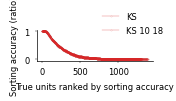

In [30]:
# set parameters
MARKERSIZE = 0.1
MARKEREDGEWIDTH = 0.1
FIGSIZE = (1.5, 0.4)
MARKER = "."

colors = (
    (0.12, 0.46, 0.70),
    (1, 0.49, 0.055),
    (0.173, 0.627, 0.173),
    (0.839, 0.153, 0.157),
    (0.58, 0.404, 0.741),
)

# count units
# n_units = max(
#     [
#         # len(accuracies_marques_ks3),
#         # len(accuracies_marques_ks2_5),
#         # len(accuracies_marques_ks2),
#         # len(accuracies_marques_ks),
#         # len(accuracies_marques_hdsp),
#     ]
# )

# plot accuracy (agreement score)
fig, ax = plt.subplots(1, figsize=FIGSIZE)

# plot
# ax.plot(
#     accuracies_marques_ks3,
#     label=f"KS 3.0",
#     marker=MARKER,
#     color=colors[0],
#     linestyle="-",
#     markersize=MARKERSIZE,
# )
# ax.plot(
#     accuracies_marques_ks2_5,
#     label=f"KS 2.5",
#     marker=MARKER,
#     color=colors[1],
#     linestyle="-",
#     markersize=MARKERSIZE,
# )

# ax.plot(
#     accuracies_marques_ks2,
#     label=f"KS 2.0",
#     marker=MARKER,
#     color=colors[2],
#     linestyle="-",
#     markersize=MARKERSIZE,
# )

ax.plot(
    accuracies_marques_ks,
    label=f"KS",
    marker=MARKER,
    color=colors[3],
    linestyle="-",
    markersize=MARKERSIZE,
)

ax.plot(
    accuracies_marques_ks_10_18,
    label=f"KS 10 18",
    marker=MARKER,
    color=colors[3],
    linestyle="-",
    markersize=MARKERSIZE,
)


# ax.plot(
#     accuracies_marques_hdsp,
#     label=f"Herdingspikes",
#     marker=MARKER,
#     color=colors[4],
#     linestyle="-",
#     markersize=MARKERSIZE,
# )

# ax.hlines(y=0.8, xmin=0, xmax=n_units, color=(0.5, 0.5, 0.5))

# add legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Sorting accuracy (ratio)")
ax.set_xlabel("True units ranked by sorting accuracy")
# ax.set_xlim([-5, n_units])

ax.legend(frameon=False, loc="lower left", bbox_to_anchor=(0.5, 0.6))

# save figures
# plt.savefig(
#     "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023/figures/3_bias/svg/true_unit_accuracies_marques.svg",
#     **savefig_cfg,
# )

#### Plot well detected ratio

In [6]:
print(sum(accuracies_marques_ks4 >= 0.8) / accuracies_marques_ks4.shape[0])
print(sum(accuracies_marques_ks3 >= 0.8) / accuracies_marques_ks3.shape[0])
# print(sum(accuracies_marques_ks2_5 >= 0.8) / accuracies_marques_ks2_5.shape[0])
# print(sum(accuracies_marques_ks2 >= 0.8) / accuracies_marques_ks2.shape[0])
print(sum(accuracies_marques_ks >= 0.8) / accuracies_marques_ks.shape[0])
# print(sum(accuracies_marques_hdsp >= 0.8) / accuracies_marques_hdsp.shape[0])

0.056195965417867436
0.048270893371757925
0.07492795389048991


In [ ]:
DET_THRES = 0.8

count_bucci = sum(bucci_accuracies >= DET_THRES)
count_marques_ks3 = sum(accuracies_marques_ks3 >= DET_THRES)
# count_marques_ks2_5 = sum(accuracies_marques_ks2_5 >= DET_THRES)
# count_marques_ks2 = sum(accuracies_marques_ks2 >= DET_THRES)
# count_marques_ks = sum(accuracies_marques_ks >= DET_THRES)
# count_marques_hdsp = sum(accuracies_marques_hdsp >= DET_THRES)

ratios = [
    count_bucci / len(bucci_accuracies),
    count_marques_ks3 / len(accuracies_marques_ks3),
    # count_marques_ks2_5 / len(accuracies_marques_ks2_5),
    # count_marques_ks2 / len(accuracies_marques_ks2),
    # count_marques_ks / len(accuracies_marques_ks),
    # count_marques_hdsp / len(accuracies_marques_hdsp),
]

fig = plt.figure(figsize=(4, 4))

gs = GridSpec(2, 2, height_ratios=[1, 4])

ax = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))

d = 0.25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)],
    markersize=12,
    linestyle="none",
    color="k",
    mec="k",
    mew=1,
    clip_on=False,
)

# lower panel
ax2.bar(np.arange(0, len(ratios), 1), ratios, color=[0.7, 0.7, 0.7])

# upper panel
ax.bar(0, ratios[0], color=[0.7, 0.7, 0.7])

# legend
ax.set_xlim([-0.7, len(ratios)])
ax2.set_ylim([0, 0.1])
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([0, 0.8])
ax.set_yticklabels([0.70, 0.80])
ax.set_ylabel("")
ax.spines[["bottom", "right", "top"]].set_visible(False)
ax2.spines[["right", "top"]].set_visible(False)
ax.plot([0], [0], transform=ax.transAxes, **kwargs)
ax2.plot([0], [1], transform=ax2.transAxes, **kwargs)

ax2.set_ylabel("Well detected units (ratio)")
ax2.set_xlabel("Spike sorter")
ax2.set_xticks(np.arange(0, len(ratios), 1))
ax2.set_xticklabels(
    [
        "Buccino ks 3.0",
        "Marques ks 3.0",
        # "Marques ks 2.5",
        # "Marques ks 2.0",
        # "Marques ks",
        # "Marques herdingspikes",
    ],
    rotation=45,
    ha="right",
)

print(ratios)
print(
    [
        count_bucci,
        count_marques_ks3,
        # count_marques_ks2_5,
        # count_marques_ks2,
        # count_marques_ks,
        # count_marques_hdsp,
    ]
)

### Plot sorters' accuracy on Buccino dataset

In [ ]:
# setup colors
colors = (
    np.array(
        [
            [166, 206, 227],
            [31, 120, 180],
            [178, 223, 138],
            [51, 160, 44],
            [251, 154, 153],
            [227, 26, 28],
            [253, 191, 111],
        ]
    )
    / 255
)

# count units
n_units = max(
    [
        len(bucci_accuracies),
    ]
)

MARKERSIZE = 4

# plot accuracy (agreement score)
fig, ax = plt.subplots(1, 1, figsize=(10, 3))

# plot
ax.plot(
    bucci_accuracies,
    label=f"Buccino (n={len(bucci_accuracies)})",
    linestyle="-",
    marker="o",
    markerfacecolor=(0.13, 0.50, 1),
    markeredgecolor="w",
    color=(0.13, 0.50, 1),
    markersize=MARKERSIZE,
    markeredgewidth=0.4,
    linewidth=1,
)

# add legend
ax.spines[["right", "top"]].set_visible(False)
ax.set_ylabel("Sorting accuracy (ratio)", fontsize=9)
ax.set_xlabel("True units ranked by sorting accuracy", fontsize=9)
ax.set_xlim([-5, n_units])
ax.legend(frameon=False, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

# save figures
# plt.savefig("figures/3_accuracy/pdf/unit_accuracies.pdf")
# plt.savefig("figures/3_accuracy/svg/unit_accuracies.svg")